# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
print(weather_api_key)

bf029c883dc27b31e6575dac7a07734f


## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries= []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)


623


* Perform a weather check on each city using a series of successive API calls.

* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [107]:
# to get data for one city. I did this so I could see how the JSON was calling the labels
# open weather url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
  
# Give city name 
city_name = input("Enter city name : ") 
  
# complete_url variable to store 
# complete url address 
complete_url = base_url + "appid=" + weather_api_key + "&q=" + city_name 
  
# get method of requests module 
# return response object 
response = requests.get(complete_url) 
  
# json method of response object  
# convert json format data into 
# python format data 
x = response.json() 
x

Enter city name : mayumba


{'coord': {'lon': 10.66, 'lat': -3.43},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 297.72,
  'feels_like': 301.19,
  'temp_min': 297.72,
  'temp_max': 297.72,
  'pressure': 1011,
  'humidity': 88,
  'sea_level': 1011,
  'grnd_level': 1010},
 'visibility': 10000,
 'wind': {'speed': 2.1, 'deg': 172},
 'clouds': {'all': 77},
 'dt': 1603388154,
 'sys': {'country': 'GA', 'sunrise': 1603342531, 'sunset': 1603386464},
 'timezone': 3600,
 'id': 2399001,
 'name': 'Mayumba',
 'cod': 200}

In [116]:
# This helps to troubleshoot the calls to the JSON data
x['coord']['lat']

-3.43

In [6]:
# This code will call the desired data from the JSON for a pre-determined city and store is in a data frame 

base_url = "http://api.openweathermap.org/data/2.5/weather?"

cities=["mayumba"]

city_list = []



# For each city, we access its information through its API
for city in cities:
    JSONContent = requests.get( base_url + "appid=" + weather_api_key + "&q=" + city +"&units=Imperial").json()
    city_list.append([JSONContent['sys']['country'], JSONContent['name'], JSONContent['clouds']['all'], 
                      JSONContent['coord']['lat'],JSONContent['coord']['lon'], 
                      JSONContent['main']['humidity'],JSONContent['wind']['speed'],
                      JSONContent['main']['temp_min'], JSONContent['main']['temp_max'], 
                      JSONContent['dt'] ])
                         
dataset = pd.DataFrame(city_list)
dataset.columns = ["Country", "City", "Cloudiness (%)", "Lat", "Lon", "Humidity (%)", 
                   "Wind Speed (mph)", "Temp Min", "Temp Max", "Date"]
dataset 
                         

,Country,City,Cloudiness (%),Lat,Lon,Humidity (%),Wind Speed (mph),Temp Min,Temp Max,Date
0,GA,Mayumba,96,-3.43,10.66,89,8.41,76.93,76.93,1603576543


In [9]:
# layering in the sleep timer an the try/except


index = 0 # index for the data frame WeatherPy data frame
index = index +1 
record=1

base_url = "http://api.openweathermap.org/data/2.5/weather?"


city_list = []

print(f'Beginning Data Retrieval \n ........................')#this is to give a visual that code has started running

# For each city, we access its information through its API
for city in cities:
    
    try:
        city1 = city.replace(" ", "%20") # remove space in city name so the URL retrieved is not broken.
        print(f'Processing Record {city}' )
    
    
        JSONContent = requests.get( base_url + "appid=" + weather_api_key + "&q=" + city +"&units=Imperial").json()
        city_list.append([JSONContent['sys']['country'], JSONContent['name'], JSONContent['clouds']['all'], 
                      JSONContent['coord']['lat'],JSONContent['coord']['lon'], 
                      JSONContent['main']['humidity'],JSONContent['wind']['speed'],
                      JSONContent['main']['temp_min'], JSONContent['main']['temp_max'], 
                      JSONContent['dt'] ])
        # Increase record counter.
        record += 1
        
        # Do not exceed API call limit.
        time.sleep(1.01)   
        
    
          
    except (KeyError, IndexError):
        print ("Opps, City Not Found !")
        
dataset = pd.DataFrame(city_list)
dataset.columns = ["Country", "City", "Cloudiness (%)", "Lat", "Lon", "Humidity (%)", 
                   "Wind Speed (mph)", "Temp Min", "Temp Max", "Date"]
dataset 

Beginning Data Retrieval 
 ........................
Processing Record puerto ayora
Processing Record talnakh
Processing Record moerai
Processing Record saldanha
Processing Record bluff
Processing Record chuy
Processing Record avarua
Processing Record tasbuget
Opps, City Not Found !
Processing Record kodiak
Processing Record pindi gheb
Processing Record port alfred
Processing Record guerrero negro
Processing Record ahumada
Opps, City Not Found !
Processing Record kumta
Processing Record moree
Processing Record barrow
Processing Record kiama
Processing Record santa cruz del sur
Processing Record mahebourg
Processing Record albany
Processing Record lavrentiya
Processing Record kungurtug
Processing Record bredasdorp
Processing Record ambodifototra
Opps, City Not Found !
Processing Record illoqqortoormiut
Opps, City Not Found !
Processing Record hermanus
Processing Record busselton
Processing Record valparaiso
Processing Record hobart
Processing Record vaitupu
Opps, City Not Found !
Process

Processing Record pochutla
Processing Record hatillo
Processing Record muncar
Processing Record clyde river
Processing Record isangel
Processing Record altay
Processing Record kaeo
Processing Record ambon
Processing Record toliary
Opps, City Not Found !
Processing Record toropets
Processing Record alpena
Processing Record zabaykalsk
Processing Record natal
Processing Record yima
Processing Record saint-louis
Processing Record nguiu
Opps, City Not Found !
Processing Record sisimiut
Processing Record alice springs
Processing Record port lincoln
Processing Record dawlatabad
Processing Record soure
Processing Record esperance
Processing Record grand centre
Opps, City Not Found !
Processing Record oranjestad
Processing Record agirish
Processing Record brightwater
Processing Record kaniama
Processing Record port elizabeth
Processing Record husavik
Processing Record saint-joseph
Processing Record malayal
Processing Record rock hill
Processing Record emba
Processing Record stoyba
Opps, City No

Processing Record kumluca
Processing Record huambo
Processing Record fiumicino
Processing Record colac
Processing Record canaries
Processing Record la ronge
Processing Record shimoda
Processing Record thaton
Processing Record okhotsk
Processing Record shumskiy
Processing Record chumikan
Processing Record kstovo
Processing Record narasaraopet
Processing Record raozan
Opps, City Not Found !
Processing Record kahului
Processing Record hamina
Processing Record waitati
Processing Record laguna
Processing Record popondetta
Processing Record longyearbyen
Processing Record praia
Processing Record nidzica
Processing Record marzuq
Processing Record peace river
Processing Record iberia
Processing Record bereda
Processing Record mao
Processing Record sorong
Processing Record chilca
Processing Record margate
Processing Record nileshwar
Processing Record san andres
Processing Record chhagalnaiya
Processing Record nioro
Processing Record isabela
Processing Record cowra
Processing Record hastings
Proc

,Country,City,Cloudiness (%),Lat,Lon,Humidity (%),Wind Speed (mph),Temp Min,Temp Max,Date
0,EC,Puerto Ayora,40,-0.74,-90.35,69,14.99,69.01,77.00,1603576654
1,RU,Talnakh,75,69.49,88.40,92,11.18,14.00,14.00,1603576655
2,PF,Moerai,58,-22.43,-151.33,77,19.06,72.72,72.72,1603576656
3,ZA,Saldanha,7,-33.01,17.94,82,6.93,62.60,62.60,1603576657
4,NZ,Bluff,89,-46.60,168.33,53,14.00,73.99,73.99,1603576659
...,...,...,...,...,...,...,...,...,...,...
561,IR,Bushehr,0,28.97,50.84,53,3.44,76.26,76.26,1603577385
562,ID,Pangkalanbuun,91,-2.68,111.62,95,1.74,74.46,74.46,1603577386
563,EG,Alexandria,40,31.22,29.96,83,4.70,69.80,69.80,1603577281
564,AR,Río Gallegos,75,-51.62,-69.22,81,8.05,44.60,44.60,1603577388


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
dataset
# Save csv file.
dataset.to_csv('weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [153]:
#  Get the indices of cities that have humidity over 100%.
dataset.loc[dataset['Humidity (%)'] >99]

,Country,City,Cloudiness (%),Lat,Lon,Humidity (%),Wind Speed (mph),Temp Min,Temp Max,Date
106,FI,Muhos,90,64.81,25.99,100,2.24,33.80,33.80,1603393966
119,TL,Airai,79,-8.93,125.41,100,1.28,60.96,60.96,1603393981
161,JP,Naze,75,28.37,129.48,100,25.28,71.60,71.60,1603394029
189,LK,Hambantota,0,6.12,81.12,100,5.82,78.80,78.80,1603394061
274,JP,Hasaki,75,35.73,140.83,100,5.82,60.80,61.00,1603394159
277,RU,Marfino,75,55.70,37.38,100,8.95,42.80,44.01,1603394162
287,IN,Thenzawl,100,23.32,92.75,100,2.24,66.11,66.11,1603394174
294,CA,Pangnirtung,90,66.15,-65.71,100,3.36,26.60,26.60,1603394182
315,US,Plover,90,44.46,-89.54,100,16.11,33.80,37.00,1603394207
392,AU,Esperance,90,-33.87,121.90,100,1.12,53.60,53.60,1603394296


In [155]:
# Make a new DataFrame equal to the city data to drop all humidity outliers 
clean_city_data=dataset.loc[dataset['Humidity (%)'] <99]
clean_city_data


,Country,City,Cloudiness (%),Lat,Lon,Humidity (%),Wind Speed (mph),Temp Min,Temp Max,Date
0,NP,Khanbari,0,27.37,87.20,55,3.22,64.20,64.20,1603393841
1,MY,George Town,20,5.41,100.34,88,2.24,77.00,78.01,1603393843
2,ID,Boyolangu,72,-8.12,111.89,88,2.86,76.30,76.30,1603393844
3,RU,Nikolskoye,90,59.70,30.79,93,4.47,44.01,46.40,1603393845
4,ES,Teguise,20,29.06,-13.56,60,10.29,71.60,71.60,1603393846
...,...,...,...,...,...,...,...,...,...,...
558,AU,Mildura,40,-34.20,142.15,33,11.41,71.60,72.00,1603394489
559,LR,Monrovia,75,6.30,-10.80,94,6.62,77.00,77.00,1603394490
560,US,Fort Thomas,40,39.08,-84.45,57,13.87,77.00,81.00,1603394492
561,FI,Iisalmi,90,63.56,27.19,93,6.93,42.80,42.80,1603394493


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

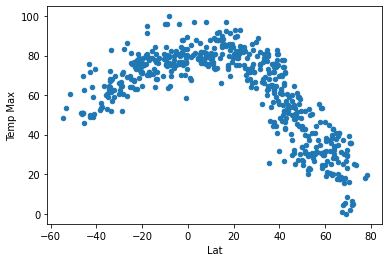

In [156]:
#Test the variables
clean_city_data.plot(x ='Lat', y='Temp Max', kind = 'scatter')

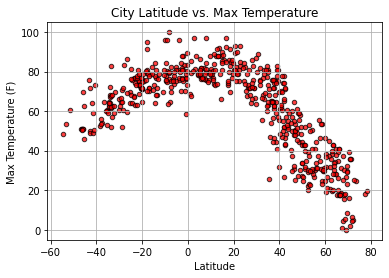

In [158]:
# Pretty Plot

plt.scatter(clean_city_data['Lat'], clean_city_data['Temp Max'], marker='o', s=20, c='r', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('City Latitude vs. Max Temperature')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('Max_Temp_vs_Lat.png')

plt.show()

## Latitude vs. Humidity Plot

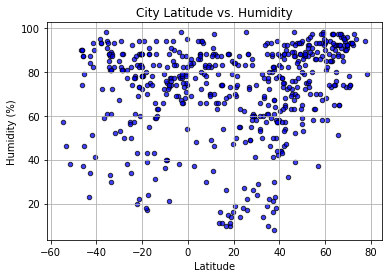

In [159]:
# Pretty Plot

plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity (%)'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('Humidity_vs_Lat.png')

plt.show()

## Latitude vs. Cloudiness Plot

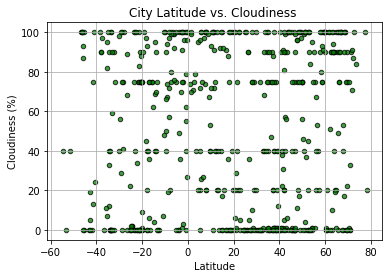

In [161]:
# Pretty Plot

plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness (%)'], marker='o', s=20, c='g', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('City Latitude vs. Cloudiness ')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('Cloudy_vs_Lat.png')

plt.show()

## Latitude vs. Wind Speed Plot

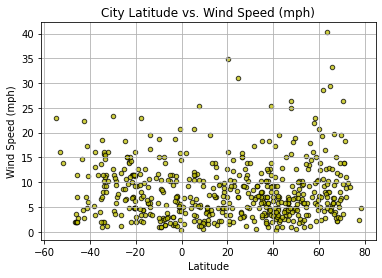

In [163]:
# Pretty Plot

plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed (mph)'], marker='o', s=20, c='y', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('City Latitude vs. Wind Speed (mph)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('Wind_vs_Lat.png')

plt.show()

## Linear Regression

In [188]:
#make a new data frame that lets you group by lat/lon
clean_city_data['Hemisphere'] = np.where(clean_city_data['Lat'] > 0, "N" , "S")

hemi_data_N =clean_city_data.loc[clean_city_data['Hemisphere']=="N"]


hemi_data_S =clean_city_data.loc[clean_city_data['Hemisphere']=="S"]

hemi_data_S

<ipython-input-188-2a58ae47247d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_city_data['Hemisphere'] = np.where(clean_city_data['Lat'] > 0, "N" , "S")


,Country,City,Cloudiness (%),Lat,Lon,Humidity (%),Wind Speed (mph),Temp Min,Temp Max,Date,Hemisphere
2,ID,Boyolangu,72,-8.12,111.89,88,2.86,76.30,76.30,1603393844,S
9,AU,Hobart,5,-42.88,147.33,87,4.34,46.00,50.00,1603393725,S
11,AU,Kununurra,75,-15.77,128.73,78,3.36,82.40,82.40,1603393838,S
13,BR,Maragogi,67,-9.01,-35.22,75,10.45,80.40,80.40,1603393706,S
16,AR,Ushuaia,40,-54.80,-68.30,57,23.04,48.20,48.20,1603393860,S
...,...,...,...,...,...,...,...,...,...,...,...
534,AU,Port Lincoln,100,-34.73,135.87,93,18.43,59.07,59.07,1603394459,S
543,BR,Santarém,75,-2.44,-54.71,66,6.93,87.80,87.80,1603394471,S
547,SZ,Sidvokodvo,68,-26.63,31.42,77,3.42,69.31,69.31,1603394475,S
556,PG,Vanimo,91,-2.67,141.30,79,1.72,76.23,76.23,1603394485,S


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

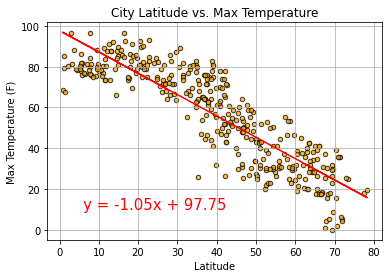

In [195]:
# Pretty Plot


# Add the linear regression equation and line to plot

x_values = hemi_data_N['Lat']
y_values = hemi_data_N['Temp Max']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

r ='r-squared=' + str(round((rvalue*rvalue), 4))

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(hemi_data_N['Lat'], hemi_data_N['Temp Max'], marker='o', s=20, c='orange', edgecolors='black', alpha=.75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Format axis/labels.
plt.title('City Latitude vs. Max Temperature')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure.
plt.savefig('North_Hemi_Max_Temp_vs_Lat.png')

plt.show()




####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

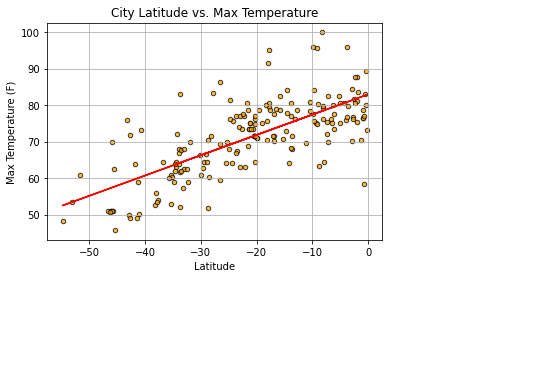

In [191]:
# Pretty Plot


# Add the linear regression equation and line to plot

x_values = hemi_data_S['Lat']
y_values = hemi_data_S['Temp Max']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(hemi_data_S['Lat'], hemi_data_S['Temp Max'], marker='o', s=20, c='orange', edgecolors='black', alpha=.75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Format axis/labels.
plt.title('City Latitude vs. Max Temperature')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure.
plt.savefig('South_Hemi_Max_Temp_vs_Lat.png')

plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

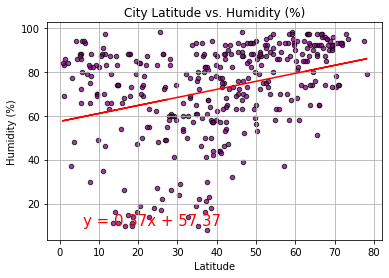

In [185]:
# Pretty Plot


# Add the linear regression equation and line to plot

x_values = hemi_data_N['Lat']
y_values = hemi_data_N['Humidity (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(hemi_data_N['Lat'], hemi_data_N['Humidity (%)'], marker='o', s=20, c='purple', edgecolors='black', alpha=.75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Format axis/labels.
plt.title('City Latitude vs. Humidity (%)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure.
plt.savefig('North_Hemi_Max_Humidity_vs_Lat.png')

plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

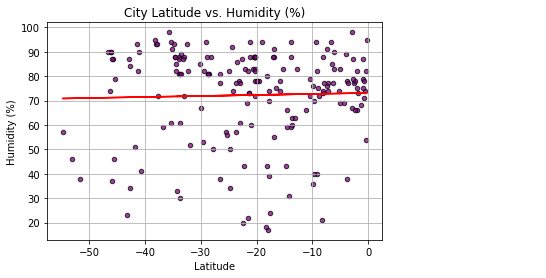

In [190]:
# Pretty Plot


# Add the linear regression equation and line to plot

x_values = hemi_data_S['Lat']
y_values = hemi_data_S['Humidity (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(hemi_data_S['Lat'], hemi_data_S['Humidity (%)'], marker='o', s=20, c='purple', edgecolors='black', alpha=.75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Format axis/labels.
plt.title('City Latitude vs. Humidity (%)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure.
plt.savefig('South_Hemi_Max_Humidity_vs_Lat.png')

plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

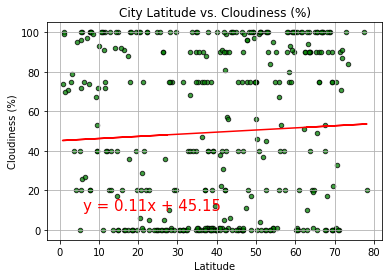

In [183]:
# Pretty Plot


# Add the linear regression equation and line to plot

x_values = hemi_data_N['Lat']
y_values = hemi_data_N['Cloudiness (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(hemi_data_N['Lat'], hemi_data_N['Cloudiness (%)'], marker='o', s=20, c='green', edgecolors='black', alpha=.75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Format axis/labels.
plt.title('City Latitude vs. Cloudiness (%)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure.
plt.savefig('North_Hemi_Max_Cloudy_vs_Lat.png')

plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

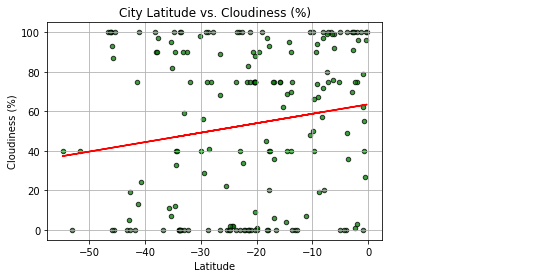

In [192]:
# Pretty Plot


# Add the linear regression equation and line to plot

x_values = hemi_data_S['Lat']
y_values = hemi_data_S['Cloudiness (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(hemi_data_S['Lat'], hemi_data_S['Cloudiness (%)'], marker='o', s=20, c='green', edgecolors='black', alpha=.75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Format axis/labels.
plt.title('City Latitude vs. Cloudiness (%)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure.
plt.savefig('South_Hemi_Max_Cloudy_vs_Lat.png')

plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

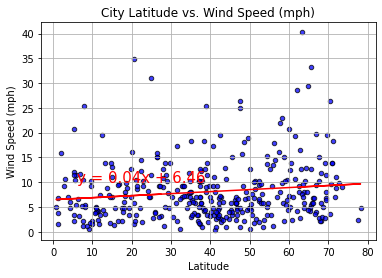

In [193]:
# Pretty Plot


# Add the linear regression equation and line to plot

x_values = hemi_data_N['Lat']
y_values = hemi_data_N['Wind Speed (mph)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(hemi_data_N['Lat'], hemi_data_N['Wind Speed (mph)'], marker='o', s=20, c='blue', edgecolors='black', alpha=.75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Format axis/labels.
plt.title('City Latitude vs. Wind Speed (mph)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure.
plt.savefig('North_Hemi_Max_Wind_vs_Lat.png')

plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

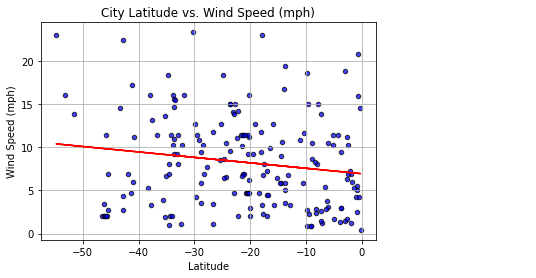

In [194]:
# Pretty Plot


# Add the linear regression equation and line to plot

x_values = hemi_data_S['Lat']
y_values = hemi_data_S['Wind Speed (mph)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(hemi_data_S['Lat'], hemi_data_S['Wind Speed (mph)'], marker='o', s=20, c='blue', edgecolors='black', alpha=.75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Format axis/labels.
plt.title('City Latitude vs. Wind Speed (mph)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure.
plt.savefig('South_Hemi_Max_Wind_vs_Lat.png')

plt.show()
